In [136]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from joblib import dump

# Tree Visualisation
from sklearn.tree import export_graphviz, plot_tree
import graphviz

In [137]:
csv_files = ['House2.csv', 'GoodDoctor2.csv', 'ENYC2.csv', 'LenoxHill2.csv']
dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    
    column_mapping = {
        df.columns[1]: 'Show',
        df.columns[2]: 'Keyword1',
        df.columns[3]: 'Keyword2',
        df.columns[4]: 'Keyword3',
        df.columns[5]: 'Keyword4',
        df.columns[6]: 'Keyword5',
        df.columns[7]: 'Keyword6',
        df.columns[8]: 'Keyword7',
        df.columns[9]: 'Keyword8',
        df.columns[10]: 'Keyword9',
        df.columns[11]: 'Keyword10',
        df.columns[12]: 'Keyword11',
        df.columns[13]: 'Keyword12',
        df.columns[14]: 'Keyword13',
        df.columns[15]: 'Keyword14',
        df.columns[16]: 'Keyword15',
        df.columns[17]: 'Keyword16',
        df.columns[18]: 'Keyword17',
        df.columns[19]: 'Keyword18',
        df.columns[20]: 'Keyword19',
        df.columns[21]: 'Keyword20',
        df.columns[22]: 'Keyword21',
        df.columns[23]: 'Keyword22',
        df.columns[24]: 'Keyword23',
    }
    
    df = df.rename(columns={col: column_mapping.get(col, col) for col in df.columns})
    
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)


In [138]:
meanSeperator = df['Show'].mean()
print(meanSeperator)

medianSeperator = df['Show'].median()
print(medianSeperator)

columnData = df['Show']
q1 = columnData.quantile(0.25)
q3 = columnData.quantile(0.75)
print(q1)
print(q3)

19.56067588325653
17.0
11.0
23.0


In [139]:
df['Mean'] = 'high'
df.loc[(df['Show']<=meanSeperator), 'Mean'] = 'low'

df['Median'] = 'high'
df.loc[(df['Show']<=medianSeperator), 'Median'] = 'low'

df['Quantile'] = 'medium'
df.loc[(df['Show']<=q1), 'Quantile'] = 'low'
df.loc[(df['Show']>=q3), 'Quantile'] = 'high'

In [140]:
df.head()

,Date,Show,Keyword1,Keyword2,Keyword3,Keyword4,Keyword5,Keyword6,Keyword7,Keyword8,...,Keyword18,Keyword19,Keyword20,Keyword21,Keyword22,Keyword23,Average,Mean,Median,Quantile
0,2004-11,4,61,52,56,59,55,95,53,68,...,43,24,20,32,50,30,47.826087,low,low,low
1,2004-12,6,55,50,46,45,49,82,47,60,...,41,27,20,26,45,26,43.086957,low,low,low
2,2005-01,6,58,55,55,50,55,86,50,70,...,43,32,24,29,43,28,45.739130,low,low,low
3,2005-02,7,67,60,50,59,53,90,62,72,...,47,30,25,33,51,31,49.652174,low,low,low
4,2005-03,11,63,53,52,49,54,82,60,73,...,45,30,23,31,44,31,47.826087,low,low,low


In [141]:
df['Quantile'].value_counts()

Quantile
medium    287
high      192
low       172
Name: count, dtype: int64

In [142]:
df.to_csv('reverse.csv', index=False)

In [143]:
QuantileDF = df
QuantileDF = QuantileDF.drop(columns=['Date', 'Show', 'Average', 'Mean', 'Median', 'Keyword2', 'Keyword6', 'Keyword23', 'Keyword13'])

In [144]:
QuantileDF['Quantile'] = QuantileDF['Quantile'].map({'low':0,'medium':1,'high':2})

X = QuantileDF.drop('Quantile', axis=1)
y = QuantileDF['Quantile']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [145]:
estx = 100
esty = 400
depx = 3
depy = 6
niter = 10
folds = 5

In [146]:
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025095759150>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000250956A9B90>})

In [147]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 255}


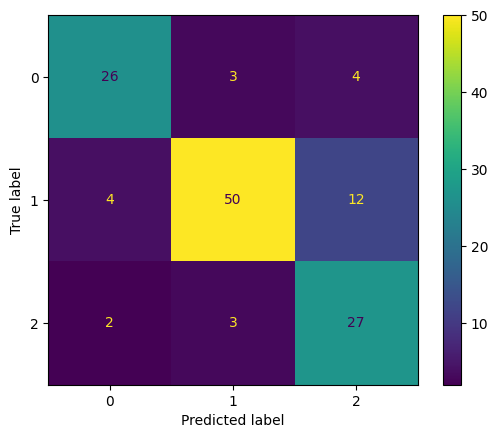

In [148]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [149]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7862595419847328
Precision: 0.7862595419847328
Recall: 0.7862595419847328



(process:24020): Pango-WARNING **: 22:23:50.498: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


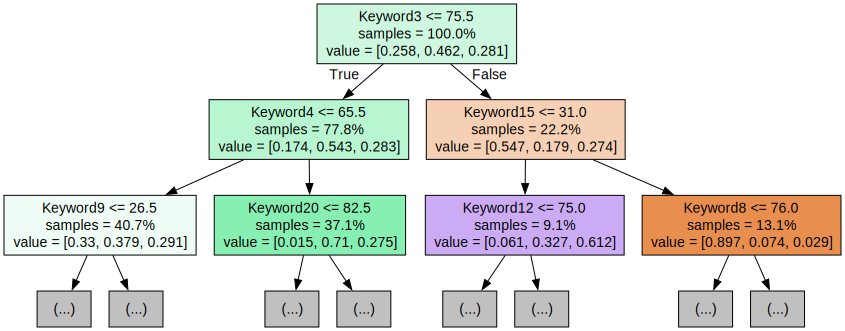


(process:4424): Pango-WARNING **: 22:23:51.070: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


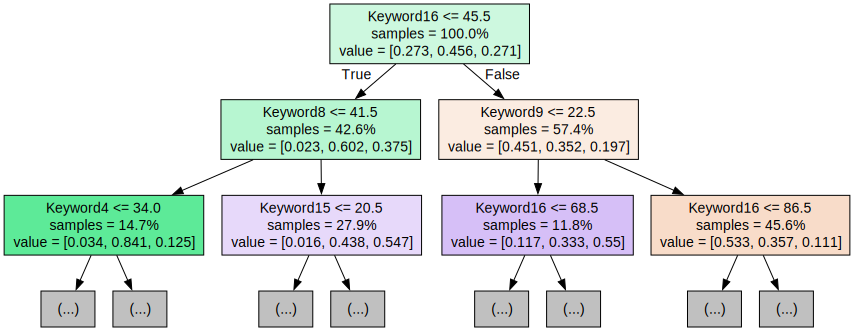


(process:13900): Pango-WARNING **: 22:23:51.661: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


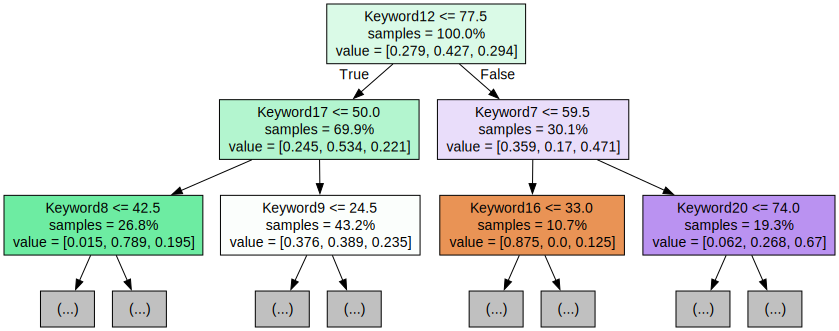

In [150]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

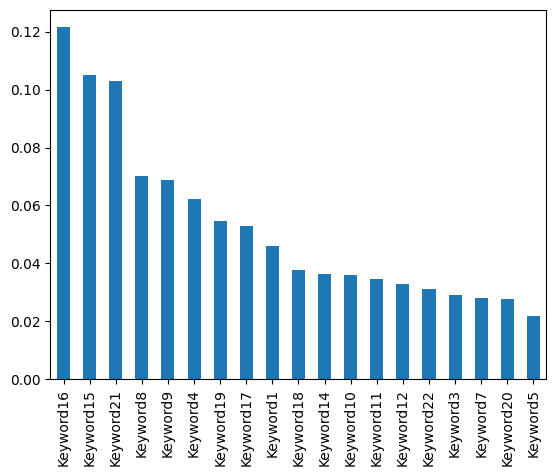

In [151]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

Best hyperparameters: {'max_depth': 5, 'n_estimators': 225}
Accuracy: 0.7121212121212122
Precision: 0.7121212121212122
Recall: 0.7121212121212122


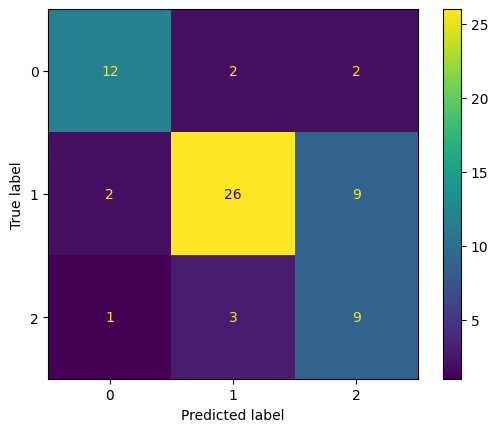

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
# Create a variable for the best model
best_rf2 = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
# Generate predictions with the best model
y_pred = best_rf2.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

In [153]:
#dump(best_rf2, 'reverseQ2.joblib')

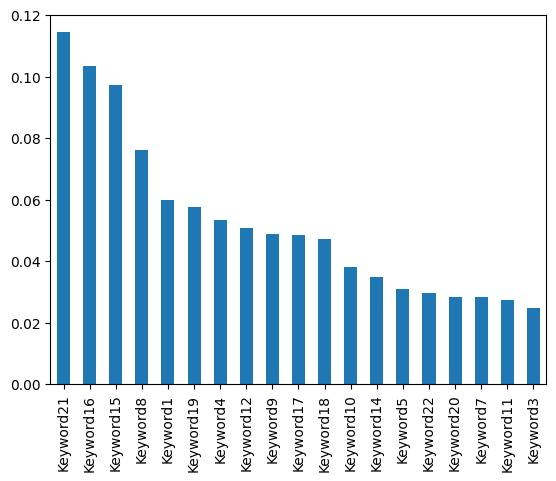

In [154]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf2.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();


(process:22576): Pango-WARNING **: 22:24:05.868: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


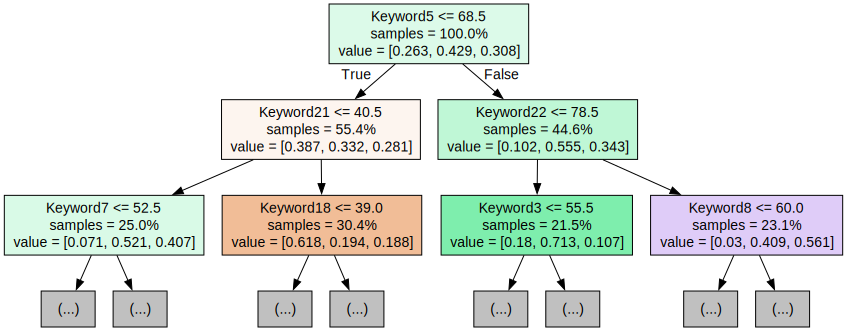


(process:24344): Pango-WARNING **: 22:24:06.527: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


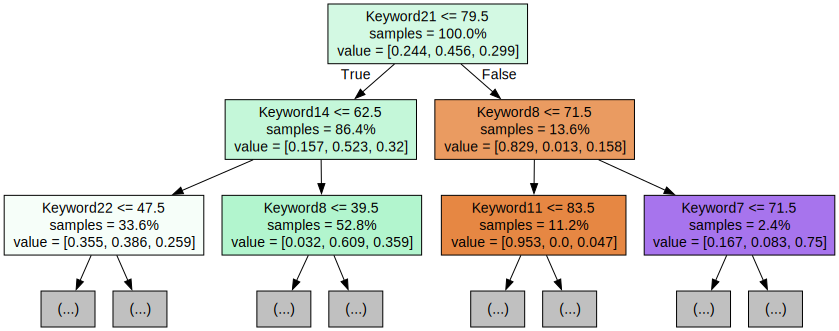


(process:18956): Pango-WARNING **: 22:24:07.186: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


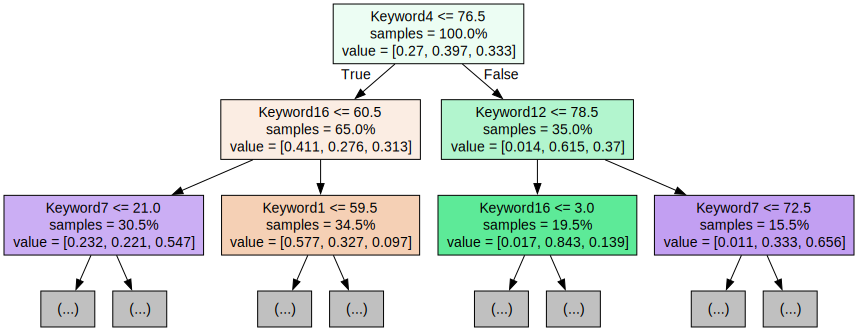

In [155]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf2.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 116}
Accuracy: 0.7908163265306123
Precision: 0.7908163265306123
Recall: 0.7908163265306123


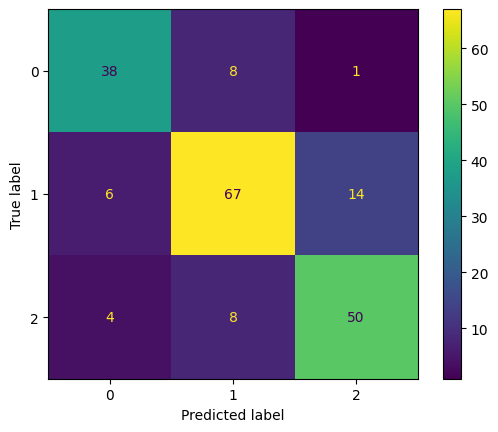

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
# Create a variable for the best model
best_rf3 = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
# Generate predictions with the best model
y_pred = best_rf3.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

In [157]:
#dump(best_rf3, 'reverseQ3.joblib')

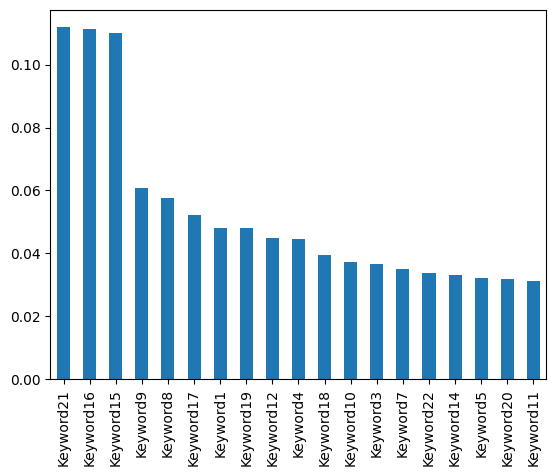

In [158]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf3.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();


(process:22320): Pango-WARNING **: 22:24:19.652: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


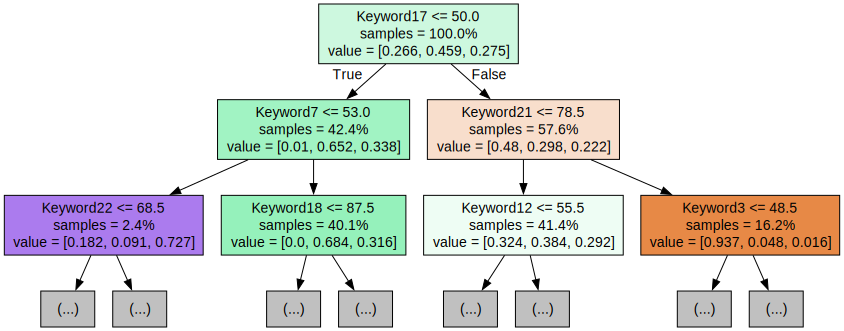


(process:7492): Pango-WARNING **: 22:24:20.236: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


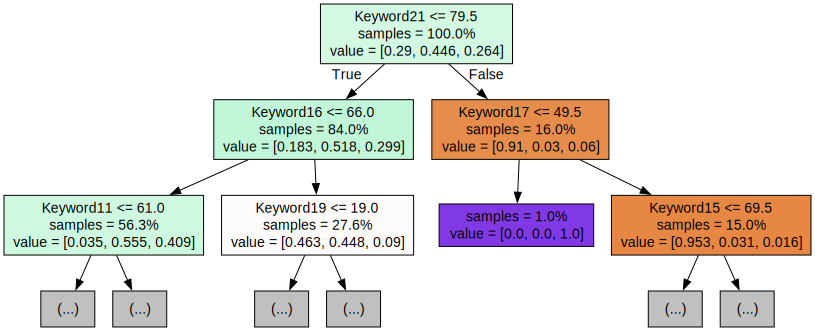


(process:13976): Pango-WARNING **: 22:24:20.853: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


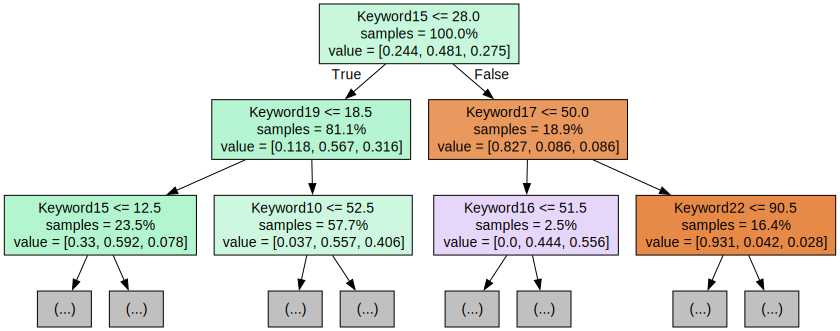

In [159]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf3.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 222}
Accuracy: 0.7049808429118773
Precision: 0.7049808429118773
Recall: 0.7049808429118773


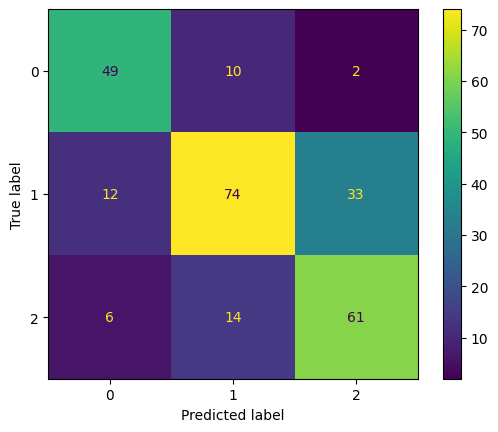

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
# Create a variable for the best model
best_rf4 = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
# Generate predictions with the best model
y_pred = best_rf4.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

In [161]:
#dump(best_rf3, 'reverseQ.joblib')


(process:8208): Pango-WARNING **: 22:24:32.698: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


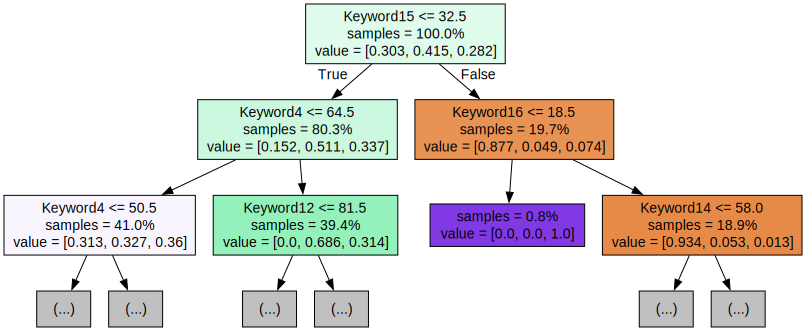


(process:4628): Pango-WARNING **: 22:24:33.369: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


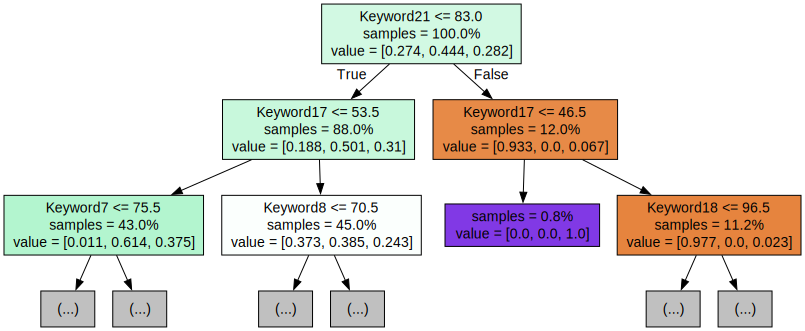


(process:6284): Pango-WARNING **: 22:24:34.216: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


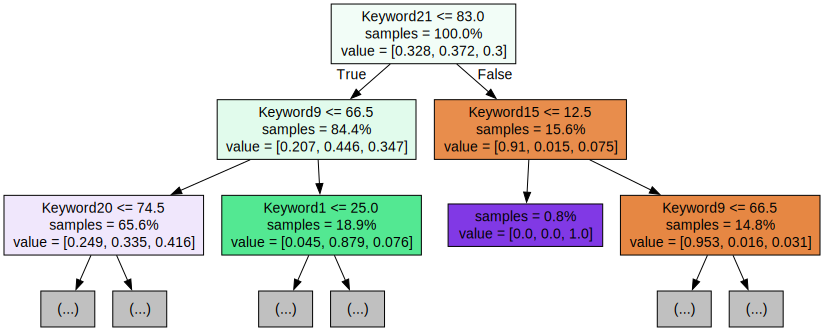

In [162]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf4.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 197}
Accuracy: 0.7147239263803681
Precision: 0.7147239263803681
Recall: 0.7147239263803681


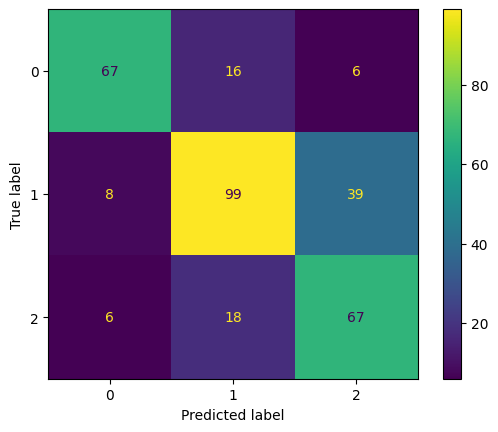

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
# Create a variable for the best model
best_rf5 = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
# Generate predictions with the best model
y_pred = best_rf5.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

In [164]:
#dump(best_rf5, 'reverseQ.joblib')


(process:25072): Pango-WARNING **: 22:24:46.464: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


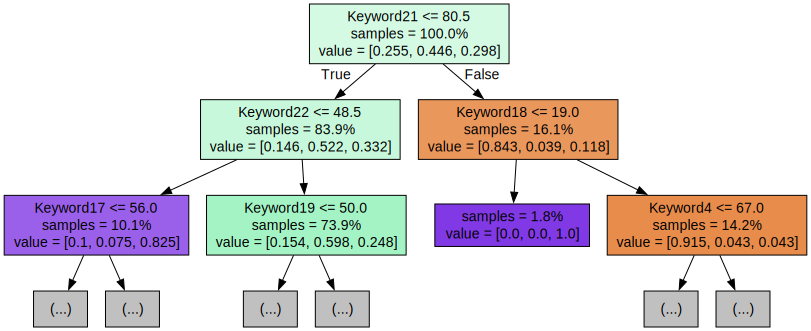


(process:20248): Pango-WARNING **: 22:24:47.143: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


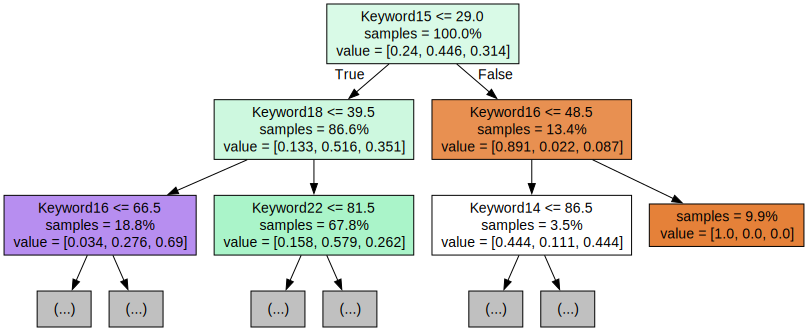


(process:1848): Pango-WARNING **: 22:24:47.776: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


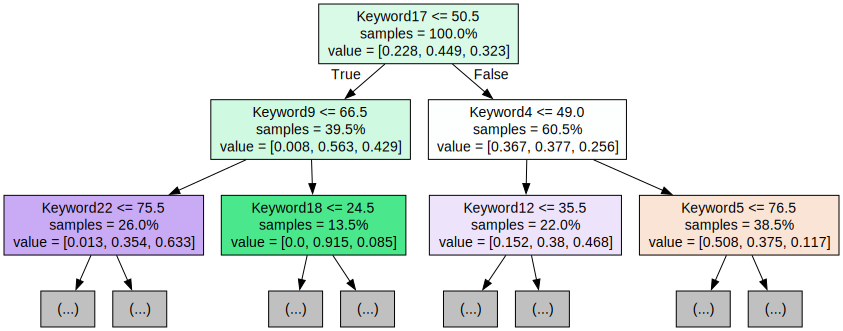

In [165]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf5.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)